# Machine Learning for Time Series

Now, let's look at some examples of applying machine learning methods to time series analysis, a relatively new field of activity for **time series**. The machine learning methods we will study were not originally developed for specific **time series** data - unlike statistical models - although they have proven to be advantageous.

So far, we have focused on statistical models for **time series** predictions. By analyzing these models, we formulate an underlying theory about the dynamics of a **time series** and the statistics that describe the noise and uncertainty of its behavior. We then use the hypothetical dynamics of the process to make predictions and also to estimate our degree of uncertainty about them. Through these methods, both model identification and parameter estimation required us to think carefully about how best to represent the dynamics of our data.

Now, we will deal with methodologies for which we have not determined an underlying process or any rules for that same process. Therefore, we will focus on identifying patterns that relevantly describe the behavior of the process to predict the result of interest, such as the appropriate classification label for a **time series**. We will also talk about unsupervised learning for **time series** in the form of clustering. We will address prediction and classification with methodologies based on decision trees and clustering as a means of classification. In the case of methodologies based on decision trees, creating the characteristics of our **time series** is a necessary step to use this methodology, since decision trees are not "time-aware" methods, unlike, say, of an ARIMA model.

Now, when it comes to clustering and distance-based classification, we will see that we have the option of using the features or the original **time series** as input. To use the **time series** as input, we will study a metric known as *dynamic time warping* (DTW), which can be applied directly to the **time series**, preserving the complete chronological set of information in our data, rather than reducing it to a necessarily limited set of characteristics.

## Time Series Classification

We will look at an example of converting electroencephalogram (EEG) **time series** data into features, which in turn can be used with machine learning algorithms. Next, we will use decision tree methods to classify the EEG data after we extract the features from the **EEG time series**.

### Selecting and Generating Features

As we previously saw, a general overview of the objectives of generating **time series** characteristics. We also saw a brief example of generating features for a **time series** dataset using **tsfresh**. Now, we will generate features with another **time series** package that we have already analyzed: **cesium**

One of the main advantages of the **cesium** package is that it makes available a variety of useful **time series** datasets, including an EEG dataset from a 2001 research paper (hhtp://perma .cc/YZD5-CTJF). The five categories of EEG **time series** present in the dataset represent segments of equal length, taken from continuous temporal readings from EEG samples, which comprise:

- EEG recordings of healthy people with eyes open and closed (two separate categories);
- EEG recordings of patients with epilepsy at times when they did not have a seizure. The recordings comprise areas of the brain unrelated to seizures (two separate categories);
- intracranial EEG recordings during a seizure (one category);

We will download this dataset using a function provided by the **cesium** package:

In [1]:
# Installing libs
##!pip install cesium
##!pip install numpy==1.21.6
##!pip install matplotlib==3.4.3

In [2]:
# Importing libs
import os
import numpy as np
from cesium import datasets
import matplotlib.pyplot as plt
from cesium.featurize import featurize_time_series as ft

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/__init__.py:21: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.6)
  from scipy.sparse import issparse


##### Functions

In [3]:
# Function to save the plot
def save_plot(image_name, directory="images", dpi=300):
    """
    Save a plot to the specified directory with the given image name.
    
    Parameters:
        image_name (str): The name of the image file (e.g., "plot.png").
        directory (str): The base directory where images will be saved.
        dpi (int): The resolution of the saved image.
    """
    
    # Use the current working directory + images if no directory is specified
    directory = os.path.abspath(directory)
    
    # Ensure the directory exists
    os.makedirs(directory, exist_ok=True)
    
    # Construct the full file path
    file_path = os.path.join(directory, image_name)
    
    # Save the plot
    plt.savefig(file_path, dpi=dpi, bbox_inches="tight")
    print(f"Plot saved to {file_path}")

In [4]:
def save_table(table, file_name, base_directory="images"):
    """
    Save a table (e.g., DataFrame) to a subdirectory relative to the current working directory.
    
    Parameters:
        table (pd.DataFrame): The table to save.
        file_name (str): The name of the file (e.g., "table.csv").
        base_directory (str): The subdirectory where the table will be saved.
    """
    # Construct the full save directory relative to the current working directory
    save_directory = os.path.join(os.getcwd(), base_directory)
    
    # Ensure the directory exists
    os.makedirs(save_directory, exist_ok=True)
    
    # Construct the full file path
    file_path = os.path.join(save_directory, file_name)
    
    # Save the table as a CSV
    table.to_csv(file_path, index=False)
    print(f"Table saved to {file_path}")

In [5]:
# Loading the dataset
eeg = datasets.fetch_andrzejak()
eeg

Loaded data from cached archive.


{'times': [array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
         2.35884766e+01, 2.35942383e+01, 2.36000000e+01]),
  array([0.00000000e+00

First, it's interesting to see some examples of the data we are analyzing to get an idea of ​​how we would like to classify these **time series**

Plot saved to /Users/dellacorte/py-projects/data-science/time-series-pocket-reference/machine-learning/images/eeg_measurements.png


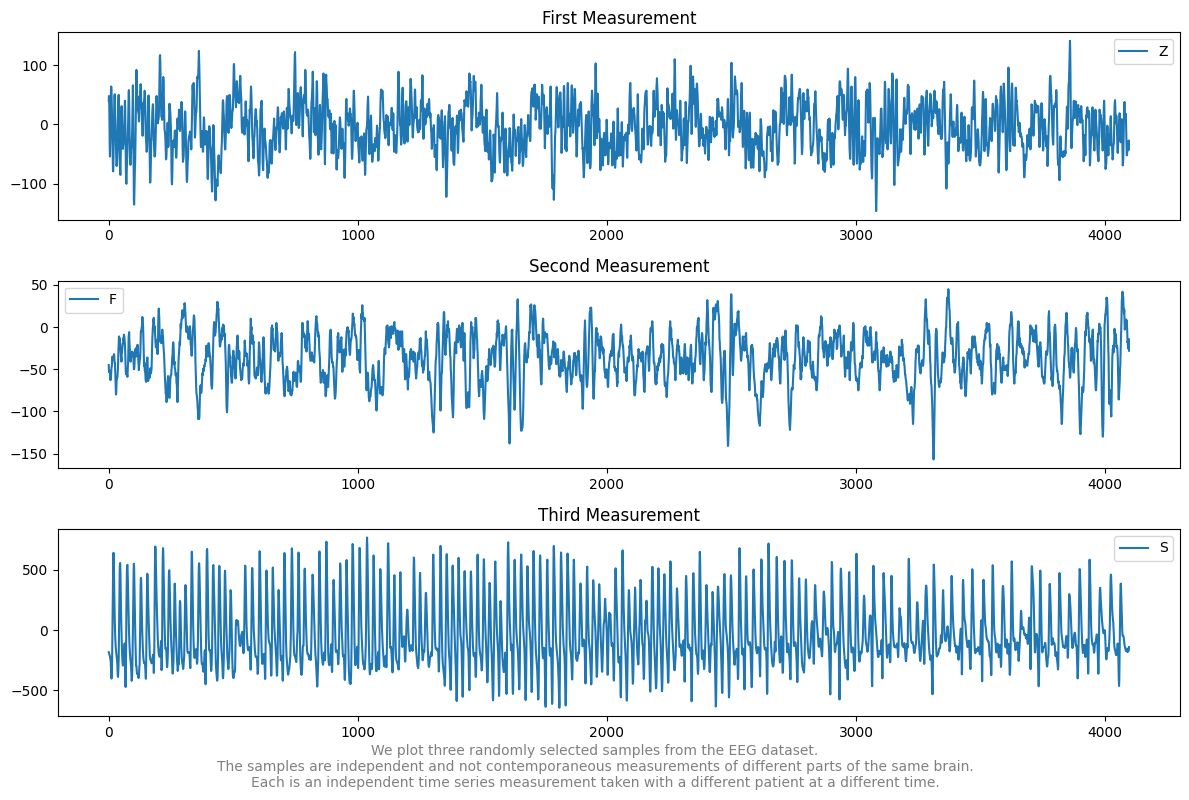

In [42]:
# Plot the data
plt.figure(figsize=(12, 8))

# Add subplots for EEG measurements
plt.subplot(3, 1, 1)
plt.plot(eeg["measurements"][0])
plt.title("First Measurement")
plt.legend([eeg["classes"][0]])

plt.subplot(3, 1, 2)
plt.plot(eeg["measurements"][300])
plt.title("Second Measurement")
plt.legend([eeg["classes"][300]])

plt.subplot(3, 1, 3)
plt.plot(eeg["measurements"][450])
plt.title("Third Measurement")
plt.legend([eeg["classes"][450]])

# Add a description below the plots
description = (
    "We plot three randomly selected samples from the EEG dataset.\n"
    "The samples are independent and not contemporaneous measurements of different parts of the same brain.\n"
    "Each is an independent time series measurement taken with a different patient at a different time."
)
plt.gcf().text(0.5, 0.01, description, fontsize=10, color="gray", ha="center")

# Adjust layout and save the plot
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Add space for description
save_plot("eeg_measurements.png")

# Show the plot
plt.show()

These visualizations serve as guidance for generating features. For example, classes Z and G appear to have less skewed data than class S. Additionally, each class has a quite different range of values, as we can see by inspecting the y-axis. This suggests that a amplitude feature may be useful. Furthermore, it is not just the general amplitude, but the general distribution of points that appears characteristically different in the three classes. In our analysis, we will use these and other characteristics, and then look at the code to generate them.

Now, we will generate the characteristics with the **cesium** package

In [7]:
# List of features to extract from the time series data
features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "percent_close_to_median",
                   "skew",
                   "max_slope"]

# Generate feature set using Cesium's featurization function
fset_cesium = ft(times           = eeg["times"],
                 values          = eeg["measurements"],
                 errors          = None,
                 features_to_use = features_to_use,
                 scheduler       = None)

In [8]:
# Display the first few rows of the resulting feature set
print(fset_cesium.head())

# Save the feature set as a CSV file in the "images" directory
save_table(fset_cesium, "eeg_features.csv")

feature amplitude percent_beyond_1_std percent_close_to_median      skew  \
channel         0                    0                       0         0   
0           143.5             0.327313                0.505004  0.032805   
1           211.5             0.290212                0.640469 -0.092715   
2           165.0             0.302660                0.515987 -0.004100   
3           171.5             0.300952                0.541128  0.063678   
4           170.0             0.305101                0.566268  0.142753   

feature     max_slope  
channel             0  
0        11107.796610  
1        20653.559322  
2        13537.627119  
3        17008.813559  
4        13016.949153  
Table saved to /Users/dellacorte/py-projects/data-science/time-series-pocket-reference/machine-learning/images/eeg_features.csv


Note that many of these values ​​are not normalized. Therefore, we would take this into account if we were using a technique that assumed normalized inputs. We must also validate that we understand what our characteristics are indicating and that our understanding corresponds to the **cesium** package calculation.

To illustrate error checking and common sense assertion, we can check the *percent_beyond_1_std* for a sample **time series**

In [9]:
np.std(eeg["measurements"][0])

40.41100040099819

In [10]:
np.mean(eeg["measurements"][0])

-4.1320478398828415

In [11]:
sample_ts = eeg["measurements"][0]
sz = len(sample_ts)
ll = -4.13 - 40.411
ul = -4.13 + 40.411

quals = [i for i in range(sz) if sample_ts[i] < ll or sample_ts[i] > ul]

len(quals) / len(sample_ts)

0.3273126678057115

### Decision Tree Methods

Decision tree-based methods portray the way humans decide things: one step at a time and in a non-linear way. They depict the way we make complicated decisions: one step at a time, thinking about how one variable should impact our decision, and then another, like a flowchart.

There are countless examples of people behaving like a decision tree when analyzing **time series** data. For example, a trader who works in the discretionary stock market may use technical indicators. But these indicators will likely be used in a serial hierarchical fashion, like a tree - first asking, for example, which direction the momentum indicator's trend is taking according to a technical indicator, before asking how the swing is evolving along the way. of time. The answer to this second question interacts with the answer to the first in a non-linear, tree-like way. It is very likely that traders have a decision tree structure in their brain, enabling them to make predictions about the direction the market is taking.

The same thing happens when a healthcare professional reads an EEG or an ECG. It is not uncommon for them to first look for the presence of one characteristic before considering another, working sequentially through a series of factors. If one characteristic is present and another is not, the result will be a different diagnosis and, consequently, a different prediction regarding the patient's prognosis.

We will use the features we generate from the EEG data as inputs for two different decision tree methods: random forest and gradient tree boosting. Both can be used in classification tasks. Our task will be to classify the EEG data we analyze solely based on the features we generate from the raw data.

#### Random Forest

Random forest is a model in which we use not one decision tree, but several. Our classification or regression is the result of the averages of the results from these trees. Random forest consider the "wisdom of the crowd". This crowd is made up of many simple models, and although none of them are good, together they often outperform a single, highly refined decision tree.

The idea of putting together a collection of models that generate forecasts instead of struggling to find the "best" model had already been structured in 1969, in the research article *The Combination of Forecasts*, written by J.M. Bates and C.W.J. Granger, two respectable statisticians. The article demonstrated that the combination (ensemble) of two different predictions based on airline passenger data could result in a model with a lower mean squared error, a surprising and, at the time, non-intuitive result. The younger generation of analysts, who often came to data analysis through machine learning rather than statistics, find this idea intuitive rather than worrying, as the random forest algorithm has become a tool for all types of data analysis. forecasting problems.

Random forest is built according to parameters that specify the number of trees to be trained, as well as the maximum depth allowed for these trees. Therefore, for each individual tree, a random sample of the data and its characteristics is used to train that tree. Roughly speaking, the trees are parameterized to be simple so that overfitting is avoided and the model can be averaged over many general models. Although no model is particularly good, they are all general enough to avoid data "traps."

As mentioned before, we input the calculated features for each **time series** sample into the model as training outputs. In theory, we could consider ways to enter our raw **time series** data instead of the calculated features, but there are numerous problems with this:

- it would be complicated to deal with **time series** of unequal length;
- a huge number of inputs (equal to or close to the number of time steps) would result in computationally heavy models and training;
- assuming that no specific time interval is very important (since any given time interval would be correlated to a feature), there would be too much noise and little signal for training from the decision tree methodology, which would consider each time interval as an entrance;

Therefore, random forests are not a good tool for working with data in its raw **time series** form, but they can be useful as long as the data is packaged into summary features. Let’s look at some specific reasons:

- from a computational efficiency/resources perspective, it's wonderful to think that we can distill **extremely long time series** into a bunch of features and find a model with reasonable accuracy;
- a random forest helps mitigate the risk of overfitting. As we saw earlier, overfitting is a problem for time series analysis because of the unpleasant synergies between overfitting and lookahead. A purposefully simple methodology helps mitigate some of this concern;
- random forests can fit well in **time series** data for which we do not have a working model or hypothesis regarding the underlying mechanisms of the process;

As a rule, analysts were more successful in implementing random forests in **time series** classification cases than in **time series** forecasting cases. On the other hand, the next method we will analyze, gradient tree boosting, was successful in both tasks.

#### Gradient boosted trees

*gradient boosting* is another way to build a combination of predictors. Boosting creates models in sequential ways based on the idea that later models must correct the errors of previous models and data misfitted by previous models must be weighted by later models. Gradient boosted trees have become the preferred and successful boosting methodology for **time series**, as evidenced in some data science competitions in recent years.

**XGBoost** builds trees sequentially, and each of them seeks to predict the residuals of the previous tree combination. So, for example, the first tree built by XGBoost will try to match data directly (a category or a numeric value). The second tree will try to predict the true value minus the predicted value. The third tree will try to predict the true value minus the predicted value of the first tree and minus the prediction of the second tree in relation to the residues of the first.

However, **XGBoost** does not simply build an infinite number of models, trying to minimize the predicted residuals from the residuals *ad infinitum*. The **XGBoost** algorithm minimizes a loss function that also includes a penalty term for model complexity, and this penalty term limits the number of trees that will be generated. It is possible to directly limit the number of trees generated. In recent years, many people have reported that when it comes to **time series**, **XGBoost** has been more successful than machine learning, especially in **Kaggle** competitions or at conferences of machine learning.

#### Examples

In the case of random forest and XGBoost, it can be easier to program a machine learning model than to understand how it works. In this example, we will train a random forest and a gradient boosted tree model to classify our EEG data based on the features we generate. We will use **sklearn** to split our data into training and testing sets:

In [12]:
# Importing ibs
import time
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(fset_cesium.values, eeg["classes"], random_state=21)

Converting categorical labels to numeric:

In [14]:
# Print the unique values in y_train
print(np.unique(y_train))

['F' 'N' 'O' 'S' 'Z']


In [15]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the labels in y_train and y_test
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Ensuring consistent data types:

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)

We will start with a **Random Forest** classifier. Here we will see how easily we can create a classification model from EEG data:

In [17]:
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3, random_state = 21)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=21)

We can then determine how accurate this trained model is for out-of-sample predictions of our data with a method call on the *Classifier* object:

In [18]:
rf_clf.score(X_test, y_test)

0.616

All it takes is a few lines of code and we have a model that performs better than we would have with a human classification. remember that, thanks to feature selection, this model only analyzes statistical synthesis rather than an entire EEG.

Now, let's go to **XGBost**

In [19]:
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3, random_state = 21)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.68

We can see that the **XGBoost** classifier model performs slightly better than the **Random Forest** model. Training takes a little longer, as we can see with the following time calculation for each model:

In [20]:
# xgb training
start = time.time()
xgb_clf.fit(X_train, y_train)
end = time.time()
xgb_time_train = end - start
xgb_time_train

0.018221139907836914

In [21]:
# xgb training
start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()
rf_time_train = end - start
rf_time_train

0.012205123901367188

It would be fair to ask whether anything in our hyperparameter set gave XGBoost an advantage over random forest. For example, if we use less complex trees defining a smaller depth? What if we leave fewer total decision trees in the model?

In [22]:
# testing the same tree numbers with less complexity
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 2, random_state = 21)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.728

In [23]:
# testing the same tree numbers with less complexity
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 2, random_state = 21)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.544

And it continues even when we reduce the complexity even further:

In [24]:
# testing the same tree numbers with less complexity
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 1, random_state = 21)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.648

In [25]:
# testing the same tree numbers with less complexity
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 1, random_state = 21)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.376

There are several possible reasons to explain the performance and supposed advantage of gradient boosted tree models over random forests. An important consideration: we don't know for sure whether all the characteristics we selected for our classification are useful. This highlights an example of when the bossting (gradient boosted tree) method may be preferable to the bagging (random forest) method. Boosting is more likely to ignore useless features because it will always use the entire set of features and favor the relevant ones, whereas some trees resulting from the bagging method will be forced to use less significant features.

#### Classification versus Regression

In the previous examples, we considered random forest and gradient boosted tree methods for classifying **time series**. These same models can also be used for **time series** predictions.

Many statisticians claim that machine learning has had less success - or the same rate - in the forecasting domain than traditional **time series** statistical analysis. However, in recent years, gradient boosted tree methods for forecasting have gained prominence and are actually outperforming traditional statistical models when considering large data sets, both in forecasting competitions and industry applications. But in these cases, it takes a lot of time to adjust the model parameters as well as to prepare the **time series** characteristics.

One of the advantages of gradient boosted tree models is that they use the "autopilot" approach to eliminate irrelevant or noisy features and focus on the most important ones. But this trend alone will not be enough to get the best performance from a model. Even for a supposedly automatic model like gradient boosted tree, the outputs can only be as good as the inputs. The best way to improve your model will be to provide high-quality and properly tested input characteristics.

There are many options to improve the current model. We could use the **XGBoost** option to generate relevant feature metrics. This would help us identify useful and useless feature attributes and thus we could expand the dataset by adding features similar to those already considered useful. We could also use a *grid search* on the hyperparameters to adjust the parameterization of our model. Finally, we could analyze the raw **time series** of our mislabeled data to see if there are any attributes that may not be represented by our current set of features. We could add features that better describe incorrectly labeled data, further expanding (data augmentation) our inputs.

## Time Series Clustering

Clustering is the general idea that data points that are similar to each other form meaningful groups subject to analysis. And this idea applies to both **time series** data and other types of data.

**Time series clustering** can be used for both classification and forecasting. In classification, we can use clustering algorithms to identify the desired number of clusters during the training phase. This way, we can use these clusters to determine types of **time series** and recognize when new samples belong to a certain group.

In prediction, we can use pure clustering or draw inspiration from it to use relevant distance metrics. There are some options for generating predictions over a horizon, *h*, in the future, which are based on clustering and related techniques. Remember that we will not observe a complete **time series**, but only its first *N* intervals, from which we can predict its value in the *N + h* time interval.

One option is to use class membership to generate a prediction based on typical behavior for that class. To do this, first determine which cluster a **time series** sample belongs to based on its first *N* time steps, and then deduce likely future behavior based on cluster membership. In this cluster, analyze specifically how the values of the **time series** tend to change their values ​​between the time interval *N* and the time interval *N + h*. See we want to perform storage on the original cluster for the entire **time series** based on its first *N* intervals, rather than all parts of the **time series** to avoid lookahead.

Another option is to predict the future behavior of a **time series** sample based on the behavior of its nearest neighbor in the sample space. In this scenario, based on metrics from the first *N* time steps, find the nearest neighbor(s) of a sample **time series** where the full trajectory is known. Then calculate the average *N + h* behavior of these nearest neighbors. This is your prediction for the current sample.

In classification and forecasting, the key is how to evaluate the similarity between **time series**. clustering can be performed with a variety of distance metrics, and much research has been devoted to studying how to measure distance in high-dimensional problems. for example, what is the "distance" between two candidates for a company vacancy? What is the "distance" between two blood samples? We can already find challenges in cross-sectional data and they are persistent in **time series** data. When applying clustering techniques to **time series** data, we have two broad classes of distance metric options:

*Feature-based distance*
- generates characteristics for **time series** and treats them as coordinates to calculate the data. This does not fully solve the problem of choosing a distance metric, but it reduces it to the same distance metrics problem presented by any cross-sectional data set.

*Distance based on raw data from the **time series***
- finds a way to determine the proximity of different **time series**, preferably in a way that can deal with different time scales and measurements, as well as other likely disparities between samples of **time series**.

<br>

We will use these two distance metrics on a **time series** dataset where each sample represents the projection of a handwritten word from a 2D image onto a 1D **time series**.

### Generating Features from Data

We've already looked at ways to generate and select features. Here, we will consider how to evaluate the distance between **time series** datasets based on the similarity of their characteristics.

In an ideal scenario, we would have already eliminated the insignificant or uninteresting **time series**, perhaps using a decision tree to assess feature importance. We do not want to include these features in a distance calculation, as they may erroneously signal differences between two **time series**, when, in fact, they do not indicate a relevant similarity with respect to the classes in our classification task or result in our prediction task.

As we did with the EEG dataset, we will begin our analysis by checking out a few class examples and noting what obvious differences there are over time and in the structure of the **time series**.

Our data is a subset of the FiftyWords dataset (https://oreil.ly/yadNp) available in the UEA and UCR Time Series Classification Repository. This dataset was released by the authors of a 2003 paper on clustering handwritten words in historical documents (https://oreil.ly/01UJ8). In that paper, the authors developed "word profiles" as a way to map the 2D image of a handwritten word onto a 1D curve, using the same number of measurements regardless of the length of the word. The repository's dataset is not identical to the article's, although the same principles apply. The intent of the original paper was to develop a method for labeling all similar or identical words in a document with a single label, so that humans could label these words digitally.

Therefore, in this example, we see *projection profiles* of word samples, where "projection" refers to the image conversion from a 2D space to a 1D space, and this, as long as it is considered an ordering, is subject to analysis of **time series**. Note that the "time" axis is not actually time, but the left-to-right progressions of written words. However, the concept is the same - ordered and equally spaced data - so, for simplicity, we will use the words *time* and *temporal* in the analysis, although this is not entirely true. For this use case, it makes no difference.

As we examine these data, and especially when we consider the patterns obvious to the human eye in the graphs, we can consider, as with EEG, some features in our analysis as a starting point - for example, the heights and locations of the spikes, as well as their characteristics, such as the intensity with which the elevation increases and the shape they take at the top of that peak.

When describing many of these features, we get the impression that they are more image recognition features than **time series** features. But this impression helps in generating characteristics. After all, visual data is typically data that we can process more easily, in addition to being more intuitive than **time series** data. Thinking in terms of image helps you think about characteristics. And it also illustrates why generating features can be extremely difficult. In some cases, when we analyze a **time series**, it may be obvious to distinguish two classes, but when we write the code, we find that things are not so obvious.

We can use a 1D histogram of all class examples or an individual example. In computational terms, perhaps this suggests less demanding ways of identifying picous or other proxy values ​​that will map into the general formats we see in **time series**. Next, we will plot the same members of the individual classes:

/var/folders/vb/yxjjx1m94n93ty4t50m8f2b40000gn/T/ipykernel_29642/419865633.py:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=[0, 0.05, 0.05, 0.05])  # Add space for description


Plot saved to /Users/dellacorte/py-projects/data-science/time-series-pocket-reference/machine-learning/images/projection_words.png


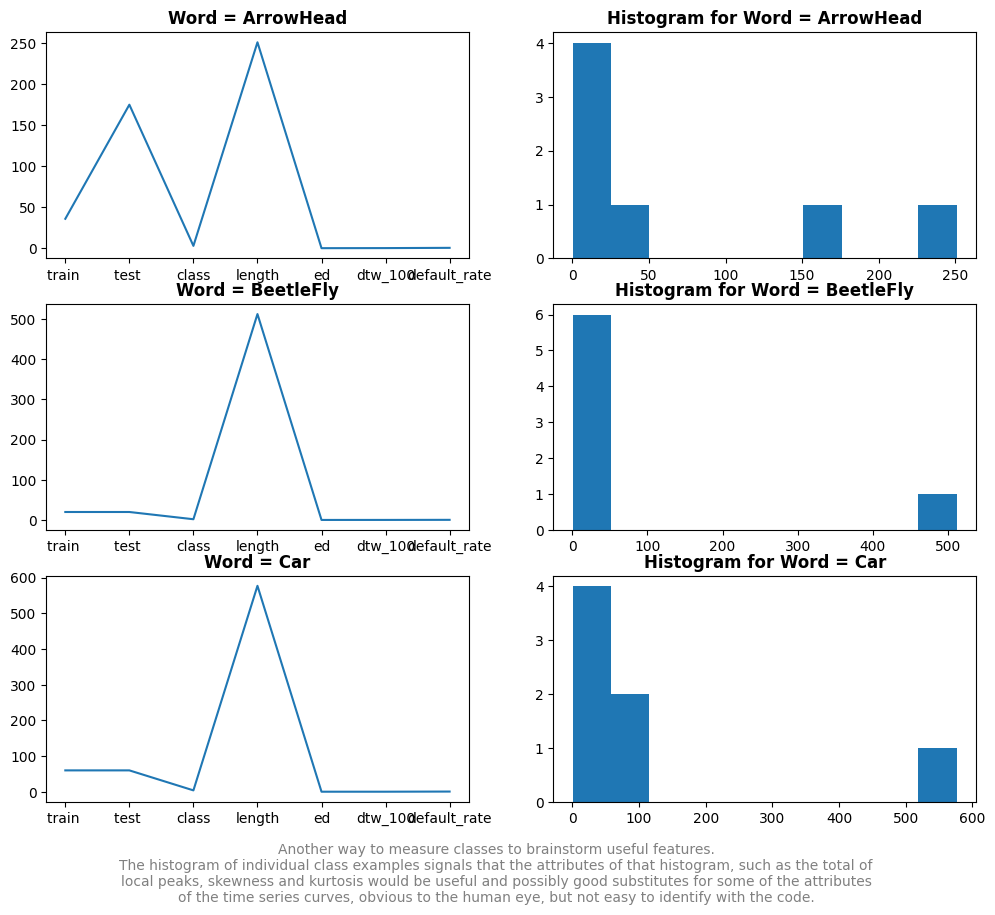

In [44]:
# Reading csv
# Specify the file path
file_path = "/Users/dellacorte/py-projects/data-science/time-series-pocket-reference/datasets/words.csv"

# Function to preprocess data for plotting
def preprocess_row(row):
    # Convert the selected columns to numeric
    row_data = pd.to_numeric(data.iloc[row, 3:-1], errors="coerce")
    # Drop NaN values
    return row_data.dropna()

# Preprocess rows for plotting
row_1_data = preprocess_row(1)
row_3_data = preprocess_row(3)
row_5_data = preprocess_row(5)

# Create a subplot layout
plt.figure(figsize=(12, 10))

# First row: Line plot and histogram for row 1
plt.subplot(3, 2, 1)
plt.plot(row_1_data)
plt.title("Word = " + str(data.loc[1, "name"]), fontweight='bold')

plt.subplot(3, 2, 2)
plt.hist(row_1_data, bins=10)
plt.title("Histogram for Word = " + str(data.loc[1, "name"]), fontweight='bold')

# Second row: Line plot and histogram for row 3
plt.subplot(3, 2, 3)
plt.plot(row_3_data)
plt.title("Word = " + str(data.loc[3, "name"]), fontweight='bold')

plt.subplot(3, 2, 4)
plt.hist(row_3_data, bins=10)
plt.title("Histogram for Word = " + str(data.loc[3, "name"]), fontweight='bold')

# Third row: Line plot and histogram for row 5
plt.subplot(3, 2, 5)
plt.plot(row_5_data)
plt.title("Word = " + str(data.loc[5, "name"]), fontweight='bold')

plt.subplot(3, 2, 6)
plt.hist(row_5_data, bins=10)
plt.title("Histogram for Word = " + str(data.loc[5, "name"]), fontweight='bold')

# Add a description below the plots
description = (
    "Another way to measure classes to brainstorm useful features.\n"
    "The histogram of individual class examples signals that the attributes of that histogram, such as the total of\n"
    "local peaks, skewness and kurtosis would be useful and possibly good substitutes for some of the attributes\n"
    "of the time series curves, obvious to the human eye, but not easy to identify with the code."
)
plt.gcf().text(0.5, 0.01, description, fontsize=10, color="gray", ha="center")

# Adjust layout and save the plot
plt.tight_layout(rect=[0, 0.05, 0.05, 0.05])  # Add space for description
save_plot("projection_words.png")

# Show the plot
plt.show()

We also need to be sure that the examples we are analyzing are not discrepant in comparison to other examples of these words. For this reason, we built the 2D histogram for two words to get a sense of individual variation:

Shape of selected words: (1, 12)


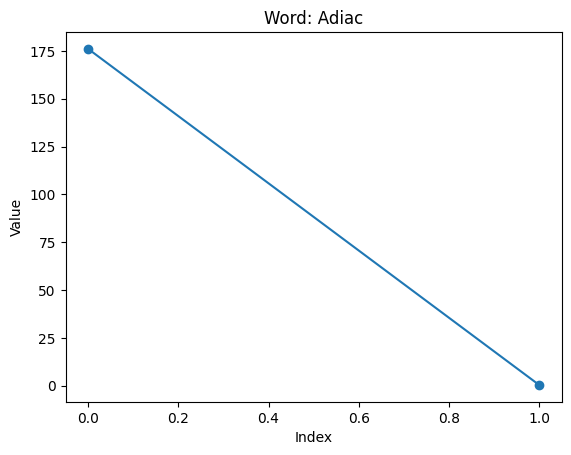

In [48]:
# Assuming `data` is your DataFrame containing the data from the CSV
x = np.array([])
y = np.array([])

# Select the word to filter
w = "Adiac"  # Replace with the desired word from the 'name' column

# Filter the DataFrame by the 'name' column
selected_words = data[data['name'] == w]

# Check the shape of the filtered DataFrame
print(f"Shape of selected words: {selected_words.shape}")

# Helper function to extract numeric part
def extract_numeric(value):
    try:
        # Attempt to convert the value to a float
        return float(value.split()[0])  # Extract the numeric part before any non-numeric text
    except (ValueError, AttributeError):
        # Handle errors gracefully by returning NaN for invalid values
        return np.nan

# Stack the data for plotting
for idx, row in selected_words.iterrows():
    # Clean and extract numeric values
    values = row[3:12].apply(extract_numeric).dropna().values  # Adjust range and clean data
    y = np.hstack([y, values])  # Stack values for y
    x = np.hstack([x, np.arange(len(values))])  # Ensure x matches the length of values

# Plot the data
fig, ax = plt.subplots()
ax.plot(x, y, marker='o')
ax.set_title(f"Word: {w}")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
plt.show()